In [91]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import json
from collections import Counter
DATA_DIR = os.path.join('data', 'boxofficemojo')

In [92]:


movielist=[]
for target_file_name in os.listdir(DATA_DIR):
    target_file_path = os.path.join(DATA_DIR, target_file_name)
    with open(target_file_path, 'r') as target_file:
        movie = json.load(target_file)
        movielist.append(movie)
print len(movielist)
     

3728


In [93]:
yearlist=[]
for amovie in movielist:
    ayear=str(amovie["year"])
    if ( ayear<>"None"):
        yearlist.append(int(ayear))
uniqueyearset=set(yearlist)



In [94]:
mycounter=Counter(yearlist)
myyeardict={}
myyearcountlist=[]
for ayear in uniqueyearset:
    myyeardict[ayear]=mycounter[ayear]
    mytuple=(ayear,mycounter[ayear])
    myyearcountlist.append(yearlist)
    

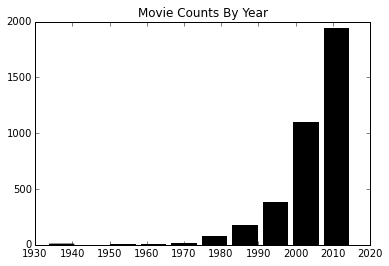

In [95]:
plt.title("Movie Counts By Year") 
nooutput=plt.hist(myyearcountlist)

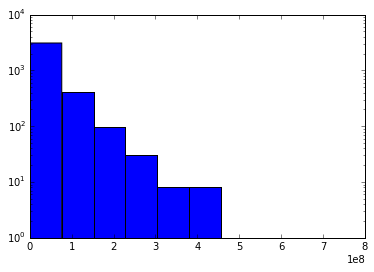

In [96]:
grosslist=[]
for amovie in movielist:
    agross=str(amovie["domestic_gross"])
    if ( agross<>"None"):
        grosslist.append(int(agross))
nooutput=plt.yscale('log')
nooutput=plt.hist(grosslist)

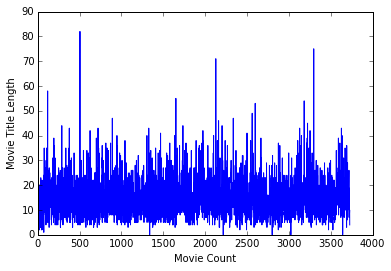

In [97]:
titleslengthlist=[]
for amovie in movielist:
    thetitle=amovie["title"]
    titleslengthlist.append(len(thetitle))

fig=plt.figure()    
ax=fig.add_subplot(111)
#ax.plot([2], [1], 'o')
ax.plot(titleslengthlist)
ax.set_xlabel('Movie Count')
ax.set_ylabel('Movie Title Length')
fig.show()
#nooutput=plt.hist(titleslengthlist)  
#plt.show()

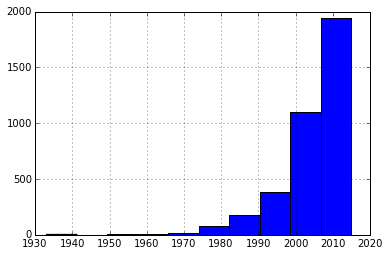

In [98]:
import pandas as pd
movies_df = pd.DataFrame(movielist)
movies_df['year'].hist()

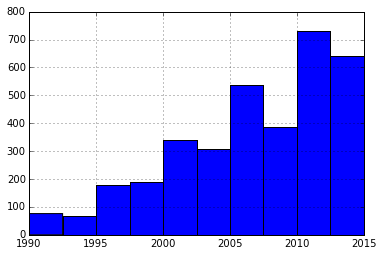

In [99]:
recent_movies = movies_df[movies_df['year']>=1990]
recent_movies['year'].hist()

In [ ]:
recent_movies.boxplot(column='domestic_gross',by='year')

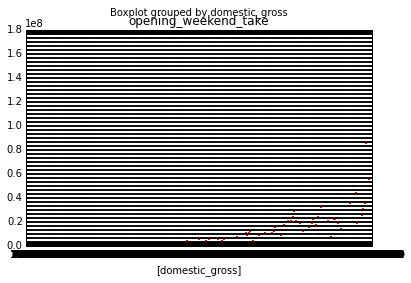

In [100]:
#known_budget_movies=recent_movies[recent_movies['production_budget']>=0]
recent_movies=recent_movies.dropna(subset=['opening_weekend_take','domestic_gross'])
recent_movies.boxplot(column=['opening_weekend_take'],by=['domestic_gross'])

In [104]:
    import statsmodels.api as sm

    Y = recent_movies.domestic_gross
    X = sm.add_constant(recent_movies.opening_weekend_take)

    linmodel = sm.OLS(Y,X).fit()

In [105]:
linmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         domestic_gross   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                 1.144e+04
Date:                Wed, 13 Apr 2016   Prob (F-statistic):               0.00
Time:                        14:07:16   Log-Likelihood:                -62057.
No. Observations:                3349   AIC:                         1.241e+05
Df Residuals:                    3347   BIC:                         1.241e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
const                 3.577e+06   5.53e+05      6.463      0.000      2.49e+06  4.66e+06
opening_weekend_take     3.4774      0.033    106.957      0.000         3.414     3.541
==============================================================================
Omnibus:                     4246.219   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1486349.405
Skew:                           6.573   Prob(JB):                         0.00
Kurtosis:                     105.366   Cond. No.                     2.02e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.02e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

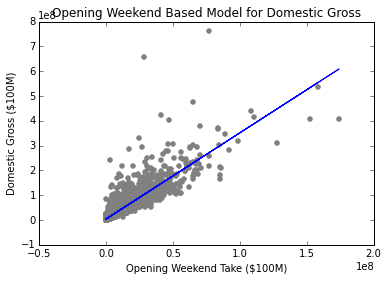

In [108]:
df=recent_movies
predicted_gross = linmodel.predict(X)
plt.scatter(df.opening_weekend_take, df.domestic_gross, color='gray')
plt.plot(df.opening_weekend_take, predicted_gross)
plt.title("Opening Weekend Based Model for Domestic Gross")
plt.xlabel("Opening Weekend Take ($100M)")
plt.ylabel("Domestic Gross ($100M)")

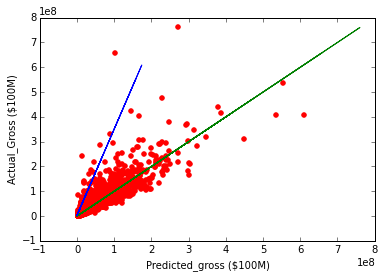

In [115]:
plt.scatter(predicted_gross,df.domestic_gross,color='red')
plt.plot(df.domestic_gross,df.domestic_gross,color='green')
plt.plot(df.opening_weekend_take, predicted_gross,color='blue')
plt.xlabel("Predicted_gross ($100M)")
plt.ylabel("Actual_Gross ($100M)")

In [116]:
print amovie

{u'opening_weekend_take': 4510408, u'release_date_limited': None, u'title': u'Zoom', u'widest_release': 2501, u'alt_title': u'Zoom (2006)', u'mojo_slug': u'zoom', u'worldwide_gross': 12506188, u'director': u'Peter Hewitt', u'production_budget': None, u'year': 2006, u'release_date_wide': u'2006-08-11', u'opening_per_theater': 1803, u'domestic_gross': 11989328}
